In [1]:
import pandas as pd 
import numpy as np   #for mathematical calulation 
import matplotlib.pyplot as plt #for plotting graphs
%matplotlib inline                  
import seaborn as sns #for data visualization 
import warnings #to ignore warning 
warnings.filterwarnings("ignore")



In [2]:
# Reading dataset 
train = pd.read_csv("/Users/Aarti Thakur/Downloads/train_ctrUa4K.csv")
test = pd.read_csv("/Users/Aarti Thakur/Downloads/test_lAUu6dG.csv")

In [3]:
#making a copy 
train_copy = train.copy()
test_copy = test.copy()

In [4]:
#understanding the dataset
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [5]:
test.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [6]:
train.shape, test.shape

((614, 13), (367, 12))

## Univariate Analysis

In [7]:
train["Loan_Status"].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [8]:
train["Loan_Status"].value_counts(normalize = True)

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

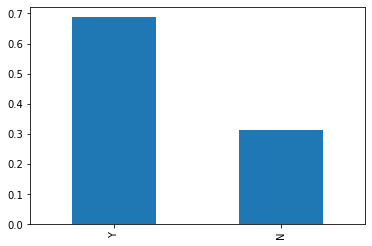

In [9]:
train["Loan_Status"].value_counts(normalize = True).plot.bar()

### Categorical Variable 

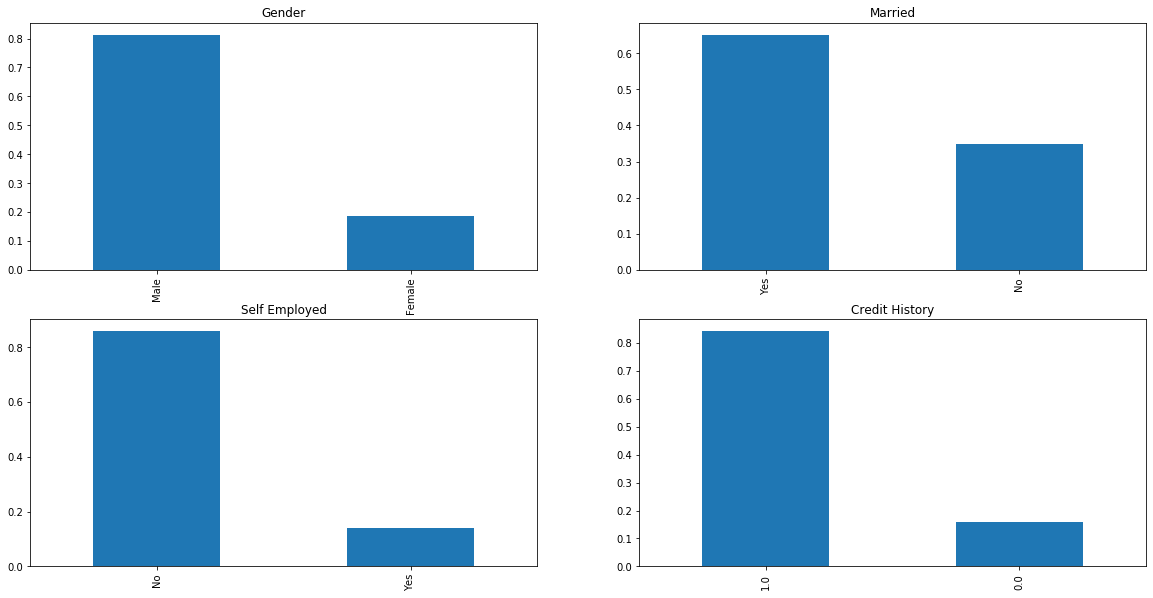

In [10]:
plt.figure(1) 
plt.subplot(221) 
train["Gender"].value_counts(normalize = True).plot.bar(figsize = (20,10), title = "Gender")
plt.subplot(222)
train["Married"].value_counts(normalize = True).plot.bar(title = "Married")
plt.subplot(223)
train["Self_Employed"].value_counts(normalize = True).plot.bar(title = "Self Employed")
plt.subplot(224)
train["Credit_History"].value_counts(normalize = True).plot.bar(title = "Credit History")
plt.show()

1. 80% are male
2. 65% are married 
3. 15% are self employed 
4. 85% repaid their loan

### Ordinal Variable 

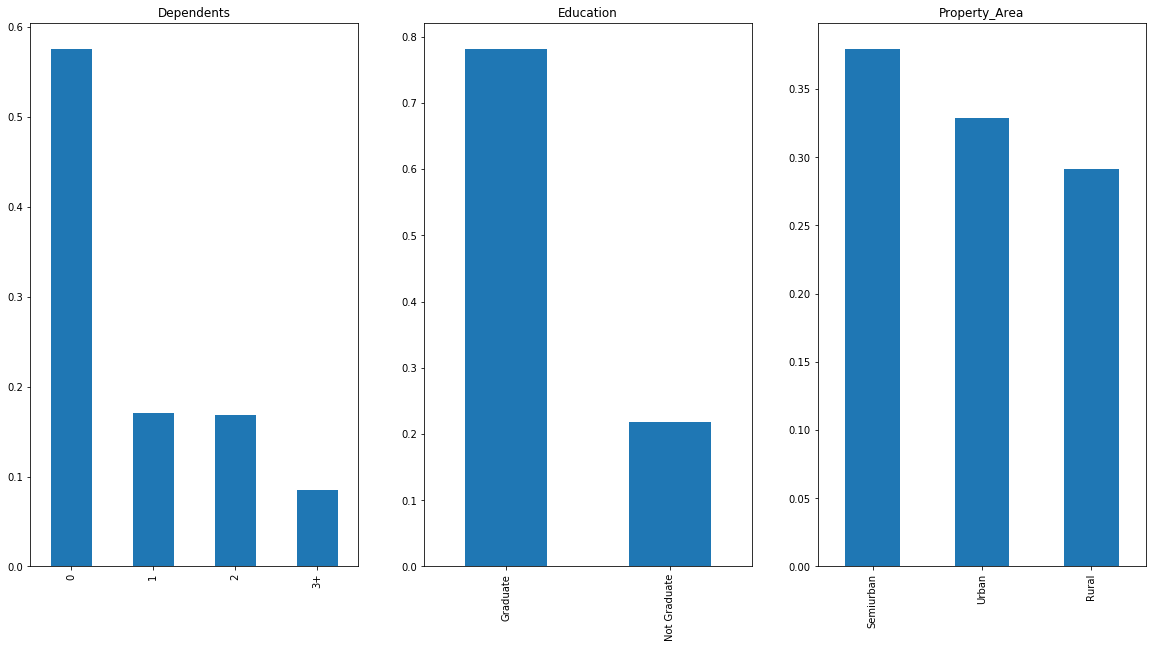

In [11]:
plt.figure(1) 
plt.subplot(131) 
train["Dependents"].value_counts(normalize = True).plot.bar(figsize = (20,10), title = "Dependents")
plt.subplot(132)
train["Education"].value_counts(normalize = True).plot.bar(title = "Education")
plt.subplot(133)
train["Property_Area"].value_counts(normalize = True).plot.bar(title = "Property_Area")
plt.show()

1. Most the aaplicants donr have dependents 
2. 78% are graduate
3. Most of the people are from Semiurban area

### Numeric variable 

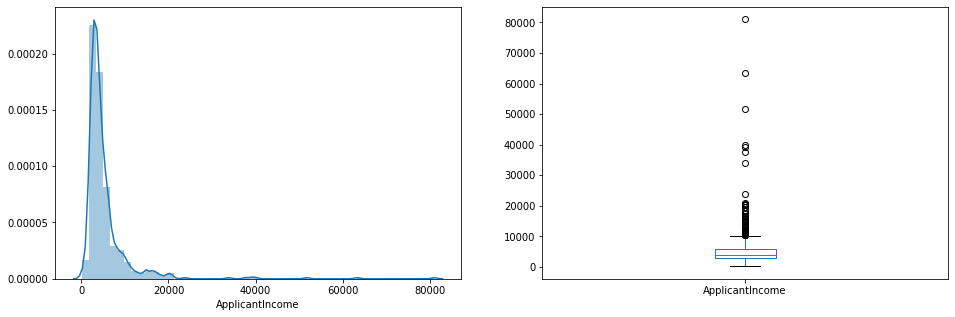

In [12]:
plt.figure(1) 
plt.subplot(121) 
sns.distplot(train["ApplicantIncome"])
plt.subplot(122) 
train["ApplicantIncome"].plot.box(figsize= (16,5))
plt.show()

Distribution of the applicanat income is towards left, hence not normalize.
Presense of Outlier can alo be seen 

Text(0.5, 0.98, '')

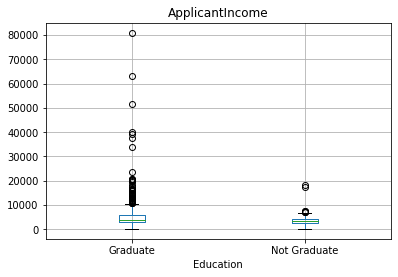

In [13]:
train.boxplot(column = "ApplicantIncome", by = 'Education')
plt.suptitle("")


Graduates have higher salaries

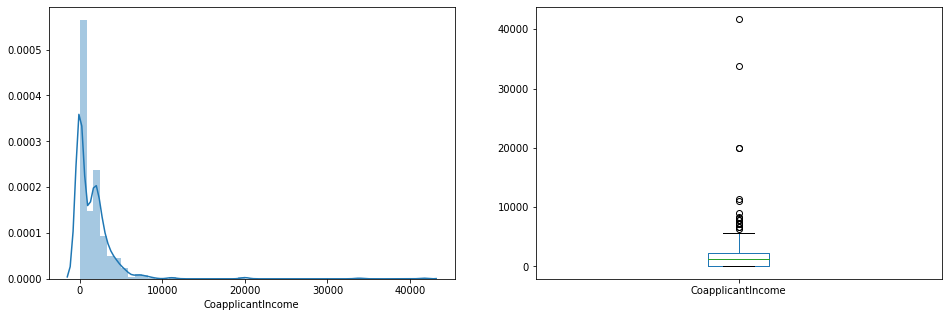

In [14]:
plt.figure(1) 
plt.subplot(121) 
sns.distplot(train["CoapplicantIncome"])
plt.subplot(122) 
train["CoapplicantIncome"].plot.box(figsize= (16,5))
plt.show()

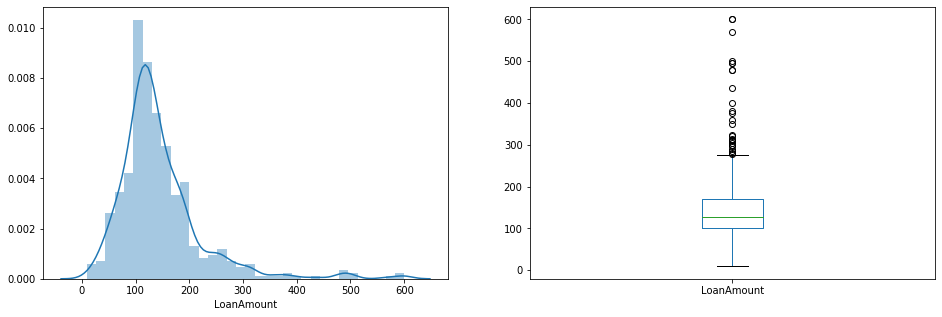

In [15]:
plt.figure(1) 
plt.subplot(121)
df= train.dropna()
sns.distplot(df["LoanAmount"]);
plt.subplot(122) 
df["LoanAmount"].plot.box(figsize= (16,5))
plt.show()

### Bivariate Analysis

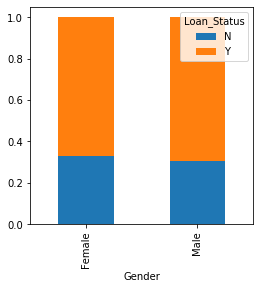

In [16]:
Gender = pd.crosstab(train['Gender'], train['Loan_Status'])
Gender.div(Gender.sum(1).astype(float), axis = 0).plot(kind = "bar", stacked = True, figsize = (4,4)) #Taking out the percentage of loan status based on gender

Proportion of loan status is more or like similar in both male and female

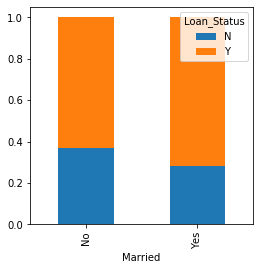

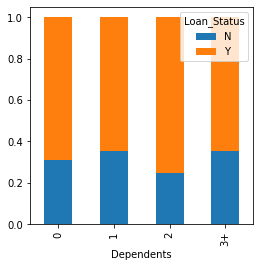

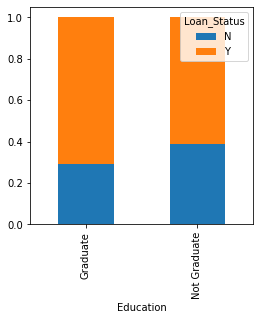

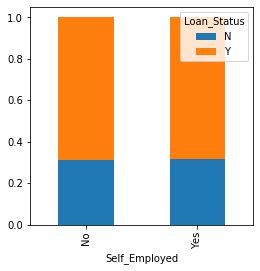

In [17]:
Married = pd.crosstab(train['Married'], train['Loan_Status'])
Dependents = pd.crosstab(train['Dependents'], train['Loan_Status'])
Education = pd.crosstab(train['Education'], train['Loan_Status'])
Self_Employed = pd.crosstab(train['Self_Employed'], train['Loan_Status'])
Married.div(Married.sum(1).astype(float), axis = 0).plot(kind = "bar", stacked = True, figsize = (4,4))
Dependents.div(Dependents.sum(1).astype(float), axis = 0).plot(kind = "bar", stacked = True, figsize = (4,4))
Education.div(Education.sum(1).astype(float), axis = 0).plot(kind = "bar", stacked = True, figsize = (4,4))
Self_Employed.div(Self_Employed.sum(1).astype(float), axis = 0).plot(kind = "bar", stacked = True, figsize = (4,4))

1. loan approved for married people are more 
2. Distribution of 1 and 3+ dependent is similar in terms of loan approval 
3. Nothing can be infered from Self_Employed distribution

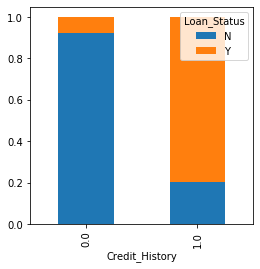

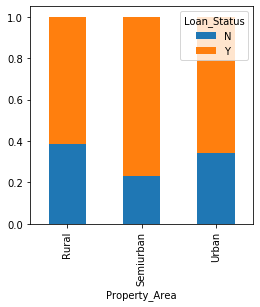

In [18]:
Credit_History = pd.crosstab(train['Credit_History'], train['Loan_Status'])
Property_Area = pd.crosstab(train['Property_Area'], train['Loan_Status'])
Credit_History.div(Credit_History.sum(1).astype(float), axis = 0).plot(kind = "bar", stacked = True, figsize = (4,4))
Property_Area.div(Property_Area.sum(1).astype(float), axis = 0).plot(kind = "bar", stacked = True, figsize = (4,4))

1. loan approved status for people who has clear credit history is high 
2. Semiurban has more loan approved


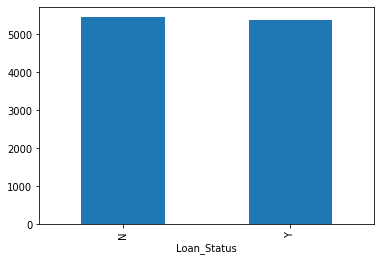

In [19]:
train.groupby("Loan_Status")['ApplicantIncome'].mean().plot(kind = "bar")

Nothing can be inferred from this plot

Text(0, 0.5, 'Percentage')

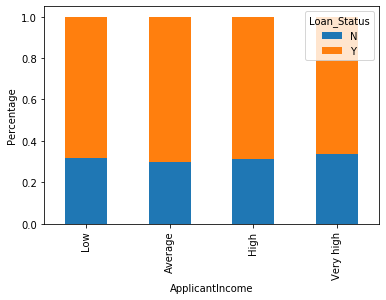

In [20]:
bins = [0, 2500, 4000, 6000, 81000] 
group = ["Low","Average", "High","Very high" ]
train['Income_bin']=pd.cut(train['ApplicantIncome'],bins,labels=group)

Income_bin = pd.crosstab(train['Income_bin'],train['Loan_Status'])
Income_bin.div(Income_bin.sum(1).astype(float), axis = 0).plot(kind = "bar", stacked = True)
plt.xlabel("ApplicantIncome")
plt.ylabel("Percentage")

This can be inferred the applicant income does not affect the loan approval 

Text(0, 0.5, 'Percentage')

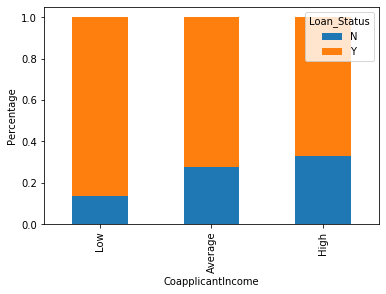

In [21]:
bins = [0, 1000, 3000, 45000] 
group = ["Low","Average", "High"]
train['CoIncome_bin']=pd.cut(train['CoapplicantIncome'],bins,labels=group)

CoIncome_bin = pd.crosstab(train['CoIncome_bin'],train['Loan_Status'])
CoIncome_bin.div(CoIncome_bin.sum(1).astype(float), axis = 0).plot(kind = "bar", stacked = True)
plt.xlabel("CoapplicantIncome")
plt.ylabel("Percentage")

This shows the low coapplicant income have hight chances of loan approval, but that should not be the case. Probably most the applicant does not have coapplicant and thats why the income is zero. 
Let's make a new attribute combining both applicant and coapplicant income and see the changes 

Text(0, 0.5, 'Percentage')

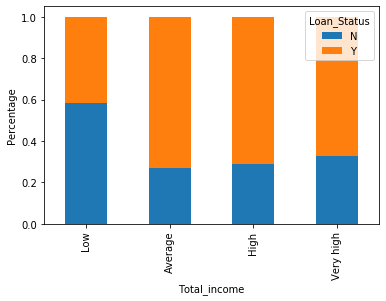

In [22]:
train["Total_income"] = train["ApplicantIncome"] + train["CoapplicantIncome"]
bins = [0, 2500, 4000, 6000, 81000] 
group = ["Low","Average", "High", "Very high"]
train['Total_income']=pd.cut(train['Total_income'],bins,labels=group)

CoIncome_bin = pd.crosstab(train['Total_income'],train['Loan_Status'])
CoIncome_bin.div(CoIncome_bin.sum(1).astype(float), axis = 0).plot(kind = "bar", stacked = True)
plt.xlabel("Total_income")
plt.ylabel("Percentage")

Now we can see the percentage of loan approval is very less in low income.

Text(0, 0.5, 'Percentage')

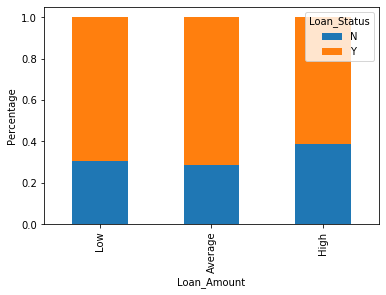

In [23]:
bins = [0, 100, 200, 700] 
group = ["Low","Average", "High"]

train['Loan_Amount_bin']=pd.cut(train['LoanAmount'],bins,labels=group)

CoIncome_bin = pd.crosstab(train['Loan_Amount_bin'],train['Loan_Status'])
CoIncome_bin.div(CoIncome_bin.sum(1).astype(float), axis = 0).plot(kind = "bar", stacked = True)
plt.xlabel("Loan_Amount")
plt.ylabel("Percentage")

It can be seen that loan approved is high when the amount is less

In [24]:
train = train.drop (["Loan_Amount_bin","Total_income","CoIncome_bin", "Income_bin"],axis = 1 )
train["Dependents"].replace("3+", 3, inplace = True)
test["Dependents"].replace("3+", 3, inplace = True)
train["Loan_Status"].replace("N", 0, inplace = True)
train["Loan_Status"].replace("Y", 1, inplace = True)

#### Creating Heat map to check the correlation better

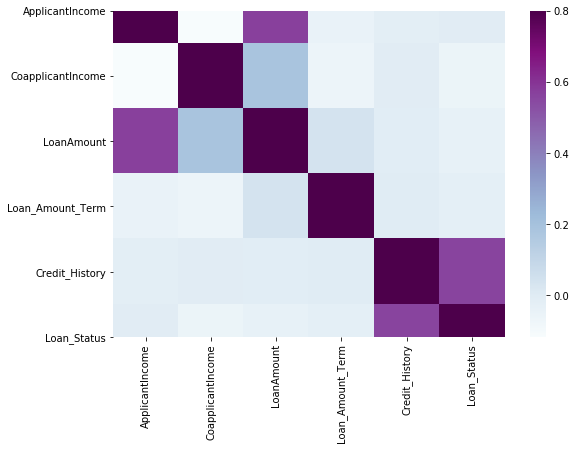

In [25]:
matrix = train.corr() 
ax = plt.subplots(figsize=(9,6)) 
sns.heatmap(matrix, vmax = 0.8, square = True,cmap = "BuPu")

1. Applicant income is correlated with the loan amount so as the Credit history and Loan status
2. Coapplicant income is also correlated with the Loan amount

In [26]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

There are missing values in the datset. 
We will impute mean and median in numerical variable and mode in categorical variable

### Missing value treatment

In [27]:
train['Gender'].fillna(train['Gender'].mode()[0], inplace = True)
train['Married'].fillna(train['Married'].mode()[0], inplace = True)
train['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace = True)
train['Self_Employed'].fillna(train['Self_Employed'].mode()[0], inplace = True)
train['Dependents'].fillna(train['Dependents'].mode()[0], inplace = True)

In [28]:
train["Loan_Amount_Term"].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [29]:
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0], inplace = True) #Since 360 is occuring most of the time therefpre using mode in numerical variable

In [30]:
train['LoanAmount'].fillna(train['LoanAmount'].median(), inplace = True) #Since it has outlier so replacing missing value with median

In [31]:
train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [32]:
test['Gender'].fillna(test['Gender'].mode()[0], inplace = True)
test['Married'].fillna(test['Married'].mode()[0], inplace = True)
test['Credit_History'].fillna(test['Credit_History'].mode()[0], inplace = True)
test['Self_Employed'].fillna(test['Self_Employed'].mode()[0], inplace = True)
test['Dependents'].fillna(test['Dependents'].mode()[0], inplace = True)
test['Loan_Amount_Term'].fillna(test['Loan_Amount_Term'].mode()[0], inplace = True)
test['LoanAmount'].fillna(test['LoanAmount'].median(), inplace = True) 

### Outlier Treatment

To remove the outlier we will do log transformation it will not affect the small values but will reduce the lagrger values. 

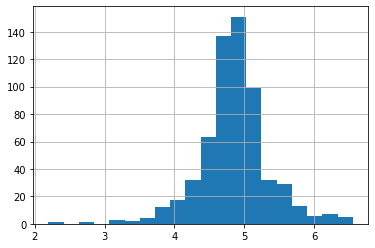

In [33]:
train['LoanAmount_log'] = np.log(train['LoanAmount'])
train['LoanAmount_log'].hist(bins=20)
test['LoanAmount_log'] = np.log(test['LoanAmount'])

### Model Building

In [34]:
train = train.drop("Loan_ID", axis = 1)
test = test.drop("Loan_ID", axis = 1)

In [35]:
x = train.drop('Loan_Status', 1)
y = train.Loan_Status

In [36]:
#Creating dummies for categorical variables 
x = pd.get_dummies(x)
train = pd.get_dummies(train)
test = pd.get_dummies(test)

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
x_train, x_cv, y_train, y_cv = train_test_split(x, y, test_size = 0.3)


In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [40]:
model = LogisticRegression()
model.fit(x_train, y_train)
LogisticRegression(C=1.0, 
                   class_weight = None, 
                   dual = False, 
                   fit_intercept= True, 
                   intercept_scaling = 1, 
                   max_iter = 100, 
                   multi_class = 'ovr', 
                   n_jobs = 1, 
                   penalty = 'l2', 
                   random_state = 1, 
                   solver= 'liblinear', 
                   tol =0.001, 
                   verbose = 0, 
                   warm_start = False) 

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='ovr', n_jobs=1, penalty='l2', random_state=1,
                   solver='liblinear', tol=0.001, verbose=0, warm_start=False)

In [41]:
#Loan status of validatin set
pred_cv = model.predict(x_cv)

In [42]:
#Calculate accuracy score
accuracy_score(y_cv,pred_cv)

0.8324324324324325

In [43]:
pred_test = model.predict(test)

In [44]:
submission = pd.read_csv("/Users/Aarti Thakur/Downloads/sample_submission_49d68Cx.csv")

In [45]:
submission['Loan_Status'] = pred_test
submission['Loan_ID'] = test_copy['Loan_ID']

In [46]:
submission['Loan_Status'].replace(0, "N", inplace = True)
submission['Loan_Status'].replace(1, "Y", inplace = True)

In [47]:
pd.DataFrame(submission, columns = ['Loan_ID', 'Loan_Status']).to_csv("/Users/Aarti Thakur/Downloads/logistics.csv")

In [48]:
from sklearn.model_selection import StratifiedKFold

In [57]:
i = 1
kf = StratifiedKFold(n_splits = 5, random_state = 1, shuffle = True)
mean_score = 0
for train_index, test_index in kf.split(x,y):
    print('\n{} of Kfold {}'.format(i,kf.n_splits))
    xtr,xvl = x.iloc[train_index],x.loc[test_index]
    ytr,yvl = y.iloc[train_index], y.loc[test_index]
    model = LogisticRegression(random_state = 1)
    model.fit(xtr,ytr)
    pred_test = model.predict(xvl)
    score = accuracy_score(yvl, pred_test)
    print('accracy_score', score)
    i+=1
    pred_test = model.predict(test)
    pred=model.predict_proba(xvl)[:,1]
    mean_score += score/5
print ('\nMean accuracy score is {}' .format(mean_score))


1 of Kfold 5
accracy_score 0.8064516129032258

2 of Kfold 5
accracy_score 0.8064516129032258

3 of Kfold 5
accracy_score 0.8114754098360656

4 of Kfold 5
accracy_score 0.7868852459016393

5 of Kfold 5
accracy_score 0.8360655737704918

Mean accuracy score is 0.8094658910629297


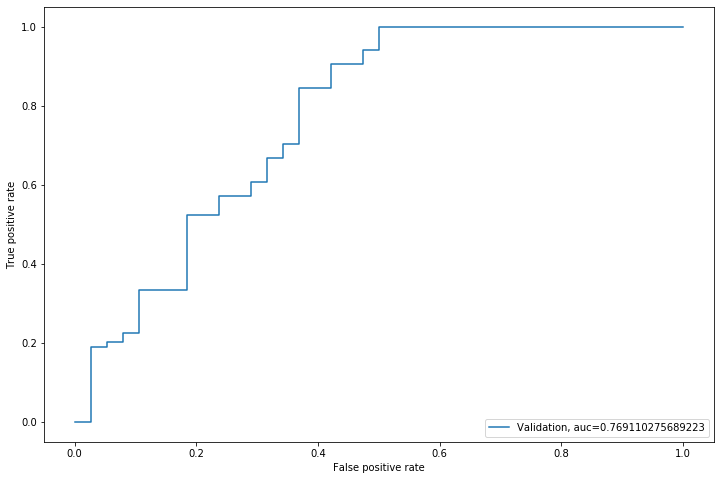

In [63]:
from sklearn import metrics 
fpr,tpr, _ = metrics.roc_curve(yvl, pred)
auc = metrics.roc_auc_score(yvl, pred)
plt.figure(figsize = (12,8))
plt.plot(fpr, tpr,label = "Validation, auc="+str(auc))
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.legend(loc = 4)
plt.show()

         

In [ ]:
submission['Loan_Status'] = pred_test
submission['Loan_ID'] = test_copy['Loan_ID']
submission['Loan_Status'].replace(0, "N", inplace = True)
submission['Loan_Status'].replace(1, "Y", inplace = True)
pd.DataFrame(submission, columns = ['Loan_ID', 'Loan_Status']).to_csv("/Users/Aarti Thakur/Downloads/logistics2.csv")

Based on the previous analysis, we will create three new feature<br>
Total income = Sum of applicant and coapplicaant income <br>
EMI = Loan amount/loan term(people having high EMI might face difficulty to pay back the loan)<br>
Balance income = Income left after paying the EMI(People having high balance income are likely to pay the loan early)<br>

In [66]:
train["Total_income"] = train["ApplicantIncome"] + train["CoapplicantIncome"]
test["Total_income"] = test["ApplicantIncome"] + test["CoapplicantIncome"]

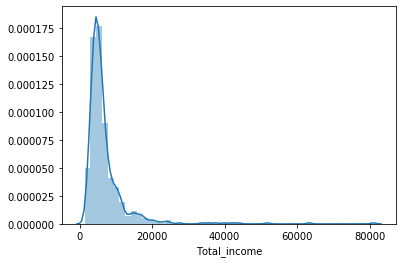

In [67]:
sns.distplot(train["Total_income"]);

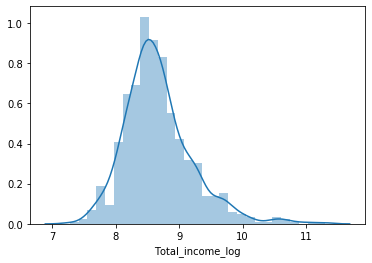

In [68]:
train['Total_income_log'] = np.log(train['Total_income'])
sns.distplot(train["Total_income_log"]);
test['Total_income_log'] = np.log(test['Total_income'])

In [69]:
train['EMI'] = train['LoanAmount']/train['Loan_Amount_Term']
test['EMI'] = test['LoanAmount']/test['Loan_Amount_Term']

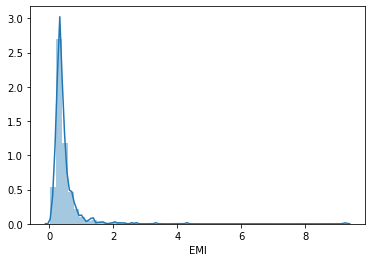

In [70]:
sns.distplot(train["EMI"]);

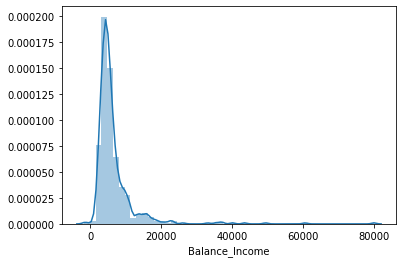

In [72]:
train['Balance_Income']= train["Total_income"]-train["EMI"]*1000
sns.distplot(train['Balance_Income']);
test['Balance_Income']= test["Total_income"]-test["EMI"]*1000

In [74]:
train = train.drop(["ApplicantIncome", "CoapplicantIncome", "LoanAmount", "Loan_Amount_Term"], axis=1)
test = test.drop(["ApplicantIncome", "CoapplicantIncome", "LoanAmount", "Loan_Amount_Term"], axis=1)

In [77]:
x  = train.drop("Loan_Status", 1)
y  = train.Loan_Status

#### Logistic regression model

In [84]:
i = 1
kf = StratifiedKFold(n_splits = 5, random_state = 1, shuffle = True)
mean_score = 0
for train_index, test_index in kf.split(x,y):
    print('\n{} of Kfold {}'.format(i,kf.n_splits))
    xtr,xvl = x.iloc[train_index],x.loc[test_index]
    ytr,yvl = y.iloc[train_index], y.loc[test_index]
    model = LogisticRegression(random_state = 1)
    model.fit(xtr,ytr)
    pred_test = model.predict(xvl)
    score = accuracy_score(yvl, pred_test)
    print('accracy_score', score)
    i+=1
    pred_test = model.predict(test)
    pred=model.predict_proba(xvl)[:,1]
    mean_score += score/5
print ('\nMean accuracy score is {}' .format(mean_score))


1 of Kfold 5
accracy_score 0.8064516129032258

2 of Kfold 5
accracy_score 0.8064516129032258

3 of Kfold 5
accracy_score 0.8032786885245902

4 of Kfold 5
accracy_score 0.7868852459016393

5 of Kfold 5
accracy_score 0.8442622950819673

Mean accuracy score is 0.8094658910629297


In [85]:
submission['Loan_Status'] = pred_test
submission['Loan_ID'] = test_copy['Loan_ID']
submission['Loan_Status'].replace(0, "N", inplace = True)
submission['Loan_Status'].replace(1, "Y", inplace = True)
pd.DataFrame(submission, columns = ['Loan_ID', 'Loan_Status']).to_csv("/Users/Aarti Thakur/Downloads/log2.csv")

#### Decision Tree model

In [79]:
from sklearn import tree


In [83]:
i = 1
kf = StratifiedKFold(n_splits = 5, random_state = 1, shuffle = True)
mean_score = 0
for train_index, test_index in kf.split(x,y):
    print('\n{} of Kfold {}'.format(i,kf.n_splits))
    xtr,xvl = x.iloc[train_index],x.loc[test_index]
    ytr,yvl = y.iloc[train_index], y.loc[test_index]
    model = tree.DecisionTreeClassifier(random_state = 1)
    model.fit(xtr,ytr)
    pred_test = model.predict(xvl)
    score = accuracy_score(yvl,pred_test)
    print("accuracy Score", score)
    i+=1
    pred_test = model.predict(test)
    mean_score += score/5
print ('\nMean accuracy score is {}' .format(mean_score))
    


1 of Kfold 5
accuracy Score 0.75

2 of Kfold 5
accuracy Score 0.75

3 of Kfold 5
accuracy Score 0.6721311475409836

4 of Kfold 5
accuracy Score 0.6967213114754098

5 of Kfold 5
accuracy Score 0.7049180327868853

Mean accuracy score is 0.7147540983606557


In [86]:
submission['Loan_Status'] = pred_test
submission['Loan_ID'] = test_copy['Loan_ID']
submission['Loan_Status'].replace(0, "N", inplace = True)
submission['Loan_Status'].replace(1, "Y", inplace = True)
pd.DataFrame(submission, columns = ['Loan_ID', 'Loan_Status']).to_csv("/Users/Aarti Thakur/Downloads/decisiontree.csv")

#### Random forest model

In [87]:
from sklearn.ensemble import RandomForestClassifier

In [88]:
i = 1
kf = StratifiedKFold(n_splits = 5, random_state = 1, shuffle = True)
mean_score = 0
for train_index, test_index in kf.split(x,y):
    print('\n{} of Kfold {}'.format(i,kf.n_splits))
    xtr,xvl = x.iloc[train_index],x.loc[test_index]
    ytr,yvl = y.iloc[train_index], y.loc[test_index]
    model = RandomForestClassifier(random_state = 1, max_depth = 10)
    model.fit(xtr,ytr)
    pred_test = model.predict(xvl)
    score = accuracy_score(yvl,pred_test)
    print("Accuracy score", score)
    i+=1
    pred_test = model.predict(test)
    mean_score += score/5
print ('\nMean accuracy score is {}' .format(mean_score))
    
    


1 of Kfold 5
Accuracy score 0.7338709677419355

2 of Kfold 5
Accuracy score 0.7903225806451613

3 of Kfold 5
Accuracy score 0.7868852459016393

4 of Kfold 5
Accuracy score 0.7704918032786885

5 of Kfold 5
Accuracy score 0.8524590163934426

Mean accuracy score is 0.7868059227921734


In [90]:
submission['Loan_Status'] = pred_test
submission['Loan_ID'] = test_copy['Loan_ID']
submission['Loan_Status'].replace(0, "N", inplace = True)
submission['Loan_Status'].replace(1, "Y", inplace = True)
pd.DataFrame(submission, columns = ['Loan_ID', 'Loan_Status']).to_csv("/Users/Aarti Thakur/Downloads/RandomForest.csv")

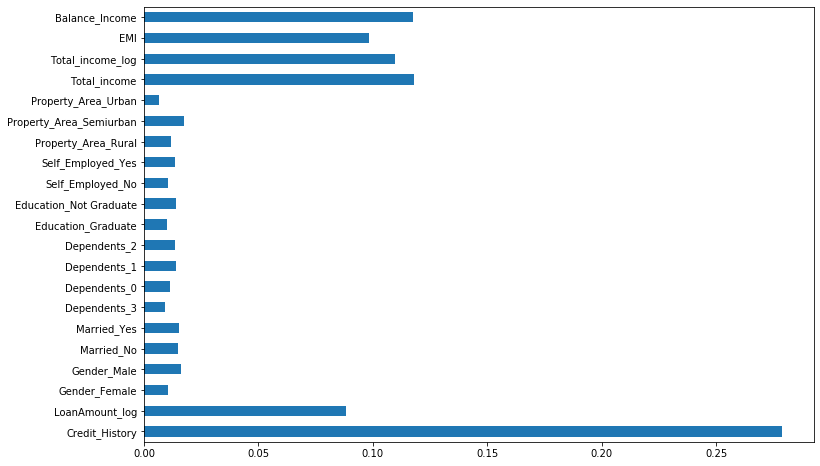

In [93]:
importances =pd.Series(model.feature_importances_, index = x.columns)
importances.plot(kind= 'barh', figsize= (12,8))

We can see Credit_History is the most important feature followed by Total income, Balance_income, EMI.